## 3. Unir el dataset de pic_eeg & pic_valence_arousal

In [5]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.model_selection import train_test_split
from collections import Counter

In [3]:
pic_val_aro = pd.read_csv('pics_val_aro.csv', index_col=None)
pics_eeg = pd.read_csv('pics_eeg_process.csv', index_col=None)

In [4]:
# Merge entre ambos data sets en la key presente en ambos: 'pictures'

df_final = pd.merge(pic_val_aro, pics_eeg, how='inner', on='pictures')
df_final.head()

df_final.to_csv('dataset_completo.csv',index= False)

In [7]:
# Observación del dataset final para prepararlo para la aplicación del modelo
# Describe: Ver si hay algún outlier muy exagerado, histogramas?
# Correlation matrix

display(df_final.shape)
display(df_final.describe())

(730, 291)

,Valence,Arousal,AF7-W1-bin1,AF7-W1-bin2,AF7-W1-bin3,AF7-W1-bin4,AF7-W1-bin5,AF7-W1-bin6,AF7-W1-bin7,AF7-W1-bin8,...,TP10-W8-bin7,TP10-W8-bin8,TP10-W9-bin1,TP10-W9-bin2,TP10-W9-bin3,TP10-W9-bin4,TP10-W9-bin5,TP10-W9-bin6,TP10-W9-bin7,TP10-W9-bin8
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,44.454377,47.722759,30.409835,27.377218,17.926656,10.239254,8.847596,10.239254,17.926656,27.377218,...,42.895507,60.843918,91.032876,64.728261,45.089683,25.847412,22.395011,25.847412,45.089683,64.728261
std,25.233442,19.463800,49.059294,29.755455,16.379787,11.787967,10.906227,11.787967,16.379787,29.755455,...,31.818998,60.756455,135.547141,72.808103,37.546884,29.030402,27.096863,29.030402,37.546884,72.808103
min,0.414000,5.851000,0.143270,0.408178,0.822930,0.354733,0.075237,0.354733,0.822930,0.408178,...,1.788263,1.001612,0.012499,1.089770,2.064923,0.846023,0.003031,0.846023,2.064923,1.089770
25%,25.641000,31.183000,9.132105,12.991328,9.290252,4.452961,3.546944,4.452961,9.290252,12.991328,...,22.250412,26.211358,19.567396,26.276860,22.657073,9.254221,6.734646,9.254221,22.657073,26.276860
50%,40.925500,50.793500,20.723286,22.219378,14.744297,7.507580,6.621629,7.507580,14.744297,22.219378,...,33.886376,41.036063,45.332910,42.182583,34.222485,17.076223,14.263126,17.076223,34.222485,42.182583
75%,55.868250,63.909000,39.899702,34.451336,23.497897,13.665314,11.982040,13.665314,23.497897,34.451336,...,50.083017,67.478869,92.795765,69.198711,52.627572,29.802150,25.788594,29.802150,52.627572,69.198711
max,98.737000,92.402000,1099.430365,642.995168,335.410603,251.754631,232.774886,251.754631,335.410603,642.995168,...,239.658810,421.655955,1026.247869,566.786802,259.613997,202.465931,187.849026,202.465931,259.613997,566.786802


In [29]:
# Hay 38 imágenes que presentan valores máximos en algunas de las columnas. Puede ser debido a algún arfacto.
# De momento no las voy a quitar.

cols = df_final.columns[3:]
pictures_outliers = []

for col in cols:
    x = (df_final.loc[df_final[col].idxmax()])[0]
    pictures_outliers.append(x)
    
sorted_by_value = sorted((Counter(pictures_outliers)).items(), key=lambda kv: kv[1], )
print(len(set(pictures_outliers)))
print(sorted_by_value)

38
[('A035', 1), ('N089', 1), ('Sp079', 2), ('P117', 2), ('A113', 2), ('H020', 2), ('Sn061', 2), ('P122', 2), ('Sp002', 2), ('Sp071', 2), ('P033', 2), ('N018', 3), ('H077', 3), ('Sn064', 3), ('P047', 3), ('Sp132', 4), ('Sp147', 4), ('Sn092', 5), ('P067', 5), ('Sn004', 5), ('Sn068', 5), ('A019', 6), ('H060', 6), ('Sn033', 7), ('Sn109', 7), ('Sn065', 8), ('P099', 8), ('P113', 13), ('Sp097', 14), ('A056', 14), ('N078', 16), ('Sp003', 16), ('A037', 16), ('A058', 16), ('Sn131', 16), ('Sn025', 16), ('H061', 24), ('N035', 25)]


In [36]:
# Separación en dataset de entrenamiento y dataset de test. Dejáre un 10% de las imágenes para test

features = df_final.columns[3:]
labels = df_final.columns[1:3]

X = df_final[features]
y = df_final[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(657, 288) (73, 288) (657, 2) (73, 2)


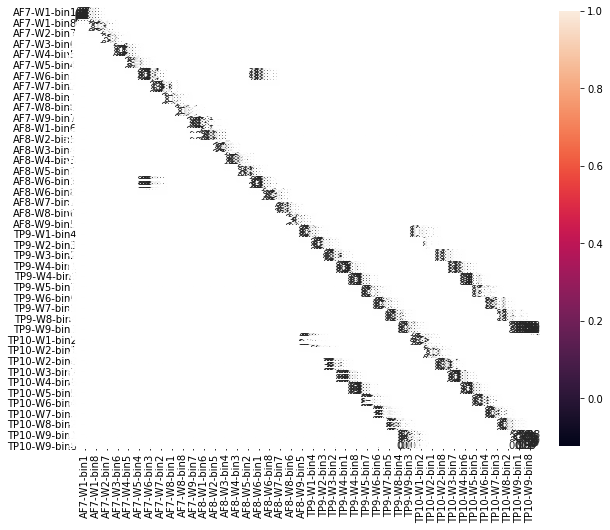

In [39]:
# Correlation matrix

X_matrix_corr = X.corr()

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(X_matrix_corr, annot= True, linewidths=.5)

In [ ]:
# Posibles transformaciones de los datos: DE MOMENTO NO HARÉ NINGUNA

# Eliminación de los canales TP9 y TP10
# Standarizacion: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# PCA: https://www.statsmodels.org/stable/generated/statsmodels.multivariate.pca.PCA.html
# Feature scaling: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
# Feature elimination: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html